In [29]:
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time

In [5]:
def open_page(url):
    chrome_options = Options()
    chrome_options.add_argument("--disable-notifications")
    chrome_options.add_argument("--headless")
    driver = webdriver.Chrome(chrome_options=chrome_options)
    driver.get(url)
    return driver

In [6]:
egl_15="MSYFLASCLGVGLLSTVSCSLQGLTSHYRENIPRFKHVANERYEVFLGDEIKFDCQTAASKISAFVEWYRNDKLLKNDQIDKDKIRKDNNRMMLHLKNIDVSDQGLWSCRVHNAYGQISRNFTVEVIDFCDYFLFPDIHHLNIPMECVCLWKYNKEAKRSDVNYAAVTGEVCSKYASRMINRARKPLPMIPCFGDHCKEFDTTPVSDFGLPGKPEDDPLVKRVVLKKDDVIVPVHDSEESPSESRTEFINADEKENKEDEEEDYSVSQPVAPDAGLTELNITAEEPPYFKSNDNIVLFNETHALPAGRTLKLNCRAKGYPEPQIIWYKNGKMLKKSSARSGGYEFKFNRWSLEVEDAVVADSGEFHCEALNKVGSAKKYFHVIIVNRMRRPPIIVPNILANQSVNINDTATFHCKVVSDLLPHIIWVRINKINGSYSYYNNSAEEYMFNYTEMDTFDKAHVHHVGDESTLTIFNVSLDDQGIYACLSGNSLGMSMANATLTVNEFMAIHLLTGDEPKIDRWTTSDYIFTTILLFLLLAATLFGILFMVCKQTLHKKGFMDDTVGLVARKKRVVVSKRPMNEDNENSDDEPSPYQIQIIETPITKKEAARKQRKRMNSENTVLSEYEVDSDPVWEVERSKLSLVHMLGEGAFGEVWKATYKETENNEIAVAVKKLKMSAHEKELIDLVSEMETFKVIGEHENVLRLIGCCTGAGPLYVVVELCKHGNLRDFLRAHRPKEEKAKKSSQELTDYLEPRKASDKDDIELIPNLTQRHLVQFAWQVAQGMNFLASKKIIHRDLAARNVLVGDGHVLKISDFGLSRDVHCNDYYRKRGNGRLPIKWMALEALDSNVYTVESDVWSYGVLLWEIMTLGGTPYPTIAMPELYANLKEGYRMEPPHLCPQEVYHLMCSCWREKLEERPSFKTIVDYLDWMLTMTNETIEGSQEFNDQFFSERSTASGPVSPMESFQKKRKHRPLSAPVNLPSEPQHTICDDYESNFSVEPPNDPNHLYCNDNMLKNHIITPETSQRIPSNNNSMSKPEF"

In [7]:
def submit_prot(proteins):
    driver = open_page('https://mizuguchilab.org/PSOPIA/')
    box=driver.find_element(By.XPATH,'/html/body/div/table/tbody/tr/td/div[3]/table/tbody/tr/td/form/textarea')
    box.send_keys(proteins)
    button=driver.find_element(By.XPATH,"/html/body/div/table/tbody/tr/td/div[3]/table/tbody/tr/td/form/p[2]/input[1]")
    button.click()
    obj = driver.switch_to.alert
    obj.accept()
    return driver

In [8]:
def retrieve_result(driver):
    results=driver.find_element(By.XPATH,"/html/body/div[2]/table/tbody/tr/td/div[1]/div/table/tbody/tr[2]/td[2]/a")
    results.click()
    return driver
    

In [9]:
def scrape(driver):
    url=driver.current_url
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html5lib')
    sup=soup.prettify()
    big=str(soup)
    spot=big.find('<span class="style3">')
    spot=spot+22
    spotter=spot+5
    results=float(big[spot:spotter])
    return results

In [10]:
results=pd.DataFrame()

In [11]:
df=pd.read_csv("parsed_seq_all.csv")

In [12]:
prot_id=df["b_b"].to_list()

In [13]:
seq=df["target"].to_list()

In [14]:
results["egl_15"]=["egl_15"]*len(prot_id)
results["partner"]=["temp"]*len(prot_id)
results["score"]=[0]*len(prot_id)

In [ ]:
for i, row in results.iterrows():
    try:
        proteins=">egl_15_A"+"\n"+egl_15+"\n" +">"+prot_id[i]+ "\n" + seq[i]
        driver=submit_prot(proteins)
        time.sleep(46)
        driver=retrieve_result(driver)
        pred=int(scrape(driver)*10000)
        results.at[i,"score"]=pred
        results.at[i,"partner"]=prot_id[i]
        driver.close()
    except:
        print("oops")
        results.at[i,"score"]=0
        results.at[i,"partner"]=prot_id[i]
        driver.close()

In [16]:
results.to_csv("egl_15_all.csv")

In [23]:
results.sort_values(by="score",ascending=False)

,egl_15,partner,score
185,egl_15,Q8T3E5,9078
183,egl_15,Q19128,9078
223,egl_15,A0A0K3AX35,8869
224,egl_15,B5BM27,8869
225,egl_15,B5BM28,8869
226,egl_15,P24348,8869
6,egl_15,A0A0K3AWC2,8786
349,egl_15,G5EC69,8204
352,egl_15,G5EFE8,8204
354,egl_15,G5EGI0,8204


In [24]:
results.head()

,egl_15,partner,score
0,egl_15,A0A0K3ASR7,7260
1,egl_15,A0A0K3ASS4,7260
2,egl_15,A0A0K3ATB0,7260
3,egl_15,A0A0K3ATB5,7260
4,egl_15,A0A0K3AVM0,7260


In [25]:
results=results.set_index("partner")

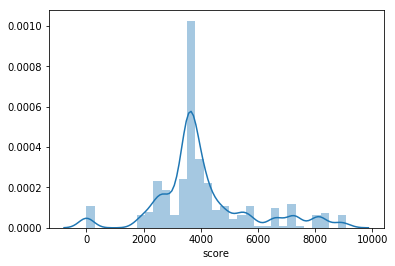

In [30]:
ax=sns.distplot(results["score"])

In [33]:
results.sort_values(by="score",ascending=False).head()

,egl_15,score
partner,,
Q8T3E5,egl_15,9078
Q19128,egl_15,9078
A0A0K3AX35,egl_15,8869
B5BM27,egl_15,8869
B5BM28,egl_15,8869


In [ ]:
final=resu